## Loading the Data

In [2]:
import pandas as pd

In [23]:
data = pd.read_csv('Downloads/heart.csv')
df = pd.DataFrame(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [27]:
df.shape

(1025, 14)

In [29]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
df.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## Data Cleaning

In [35]:
df = df.drop_duplicates()

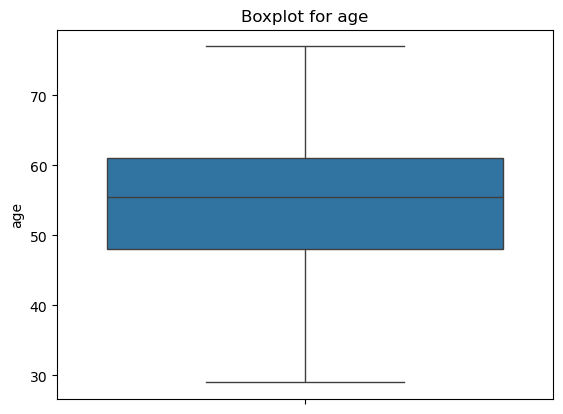

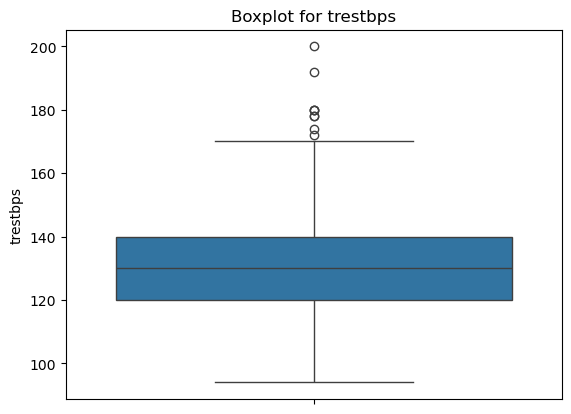

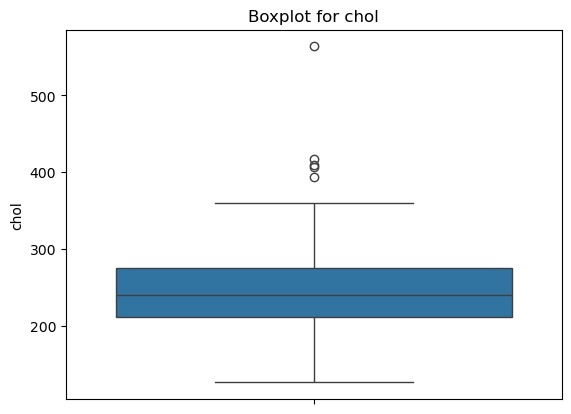

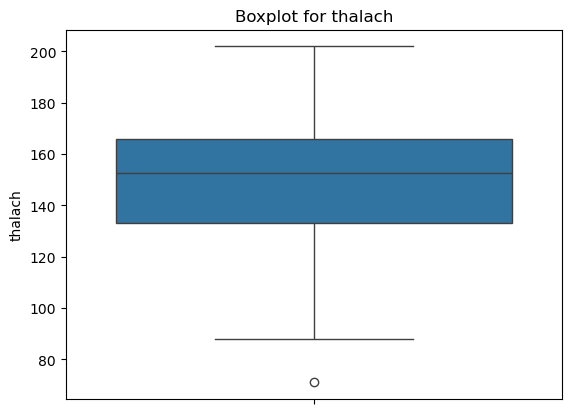

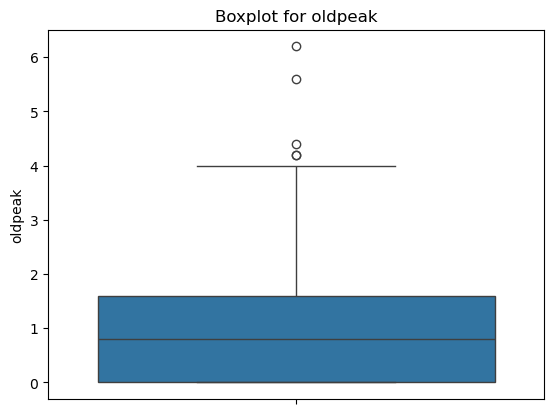

In [39]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    sns.boxplot(df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [41]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['chol'] < (Q1 - 1.5 * IQR)) | (df['chol'] > (Q3 + 1.5 * IQR)))]

## Exploratory Data Analysis (EDA)

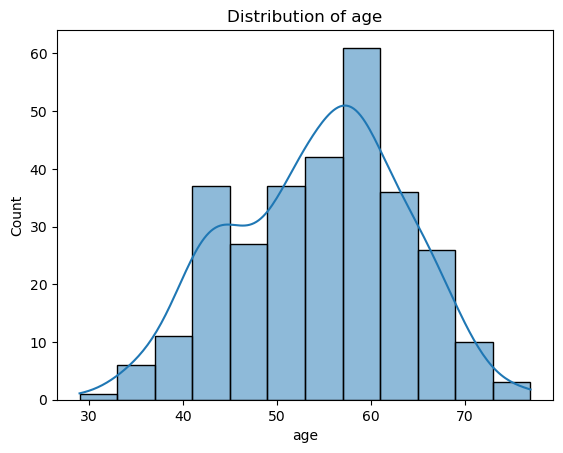

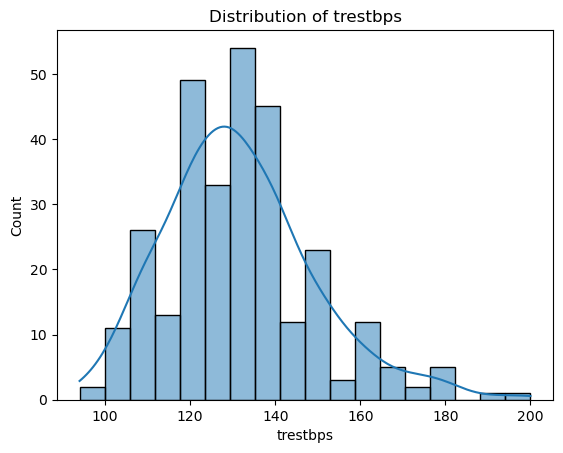

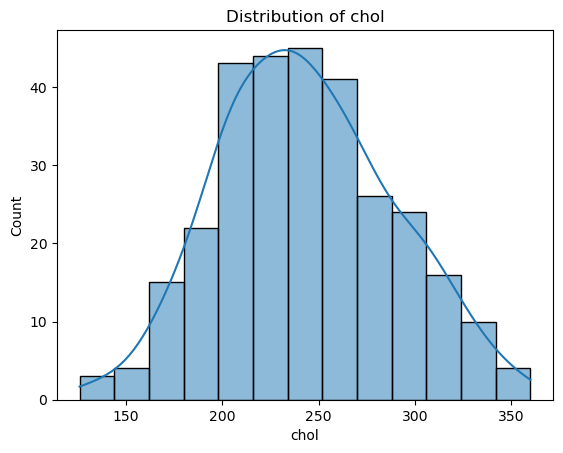

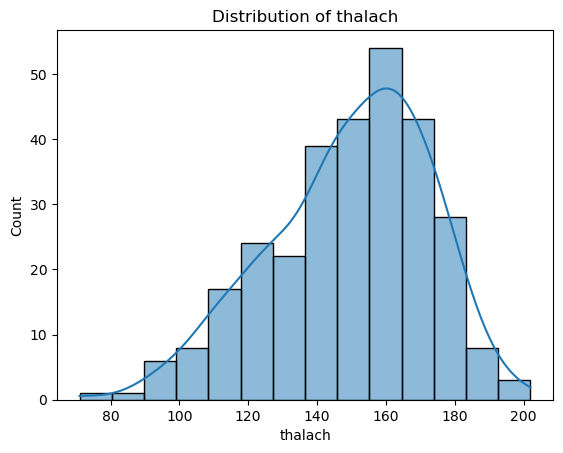

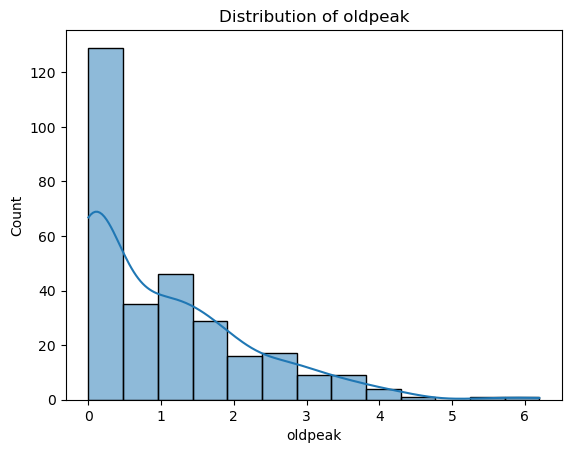

In [51]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

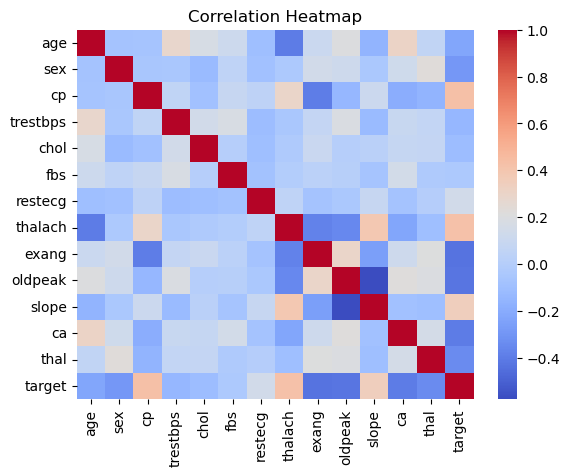

In [62]:
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

High correlation between age and chol could indicate age-related cholesterol buildup.
Strong inverse correlation between thalach and target (heart disease) suggests that higher maximum heart rates reduce heart disease risk.

## Question Formulation and Analysis

### 1. What is the age distribution of individuals with and without heart disease?

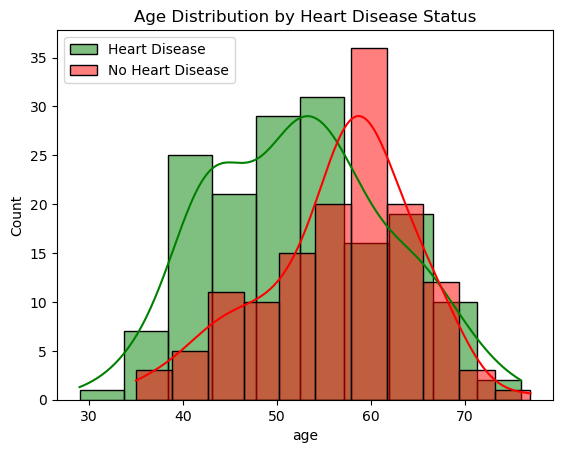

In [66]:
sns.histplot(df[df['target'] == 1]['age'], kde=True, label='Heart Disease', color='green')
sns.histplot(df[df['target'] == 0]['age'], kde=True, label='No Heart Disease', color='red')
plt.legend()
plt.title('Age Distribution by Heart Disease Status')
plt.show()

Heart disease is more prevalent in older individuals (e.g., ages 40–60).
Younger individuals (below 40) have a lower likelihood of heart disease.
Preventative measures for middle-aged and older adults could be a focus.

### 2.Do men or women have a higher likelihood of heart disease?

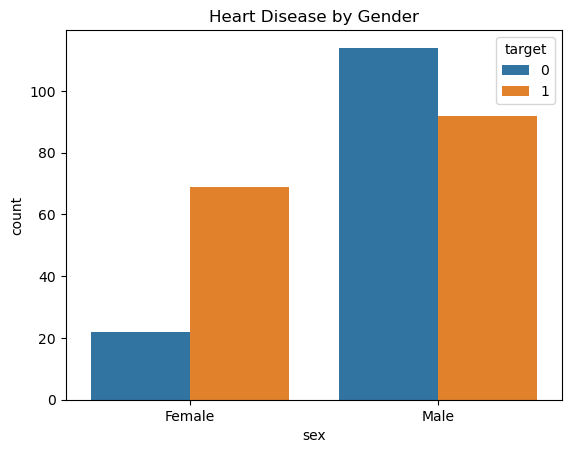

In [94]:
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

Males may have a higher prevalence of heart disease compared to females (common in such datasets).
While females may have lower overall cases, their symptoms can often be atypical, requiring tailored diagnostic measures.

### 3.How does cholesterol vary between individuals with and without heart disease?

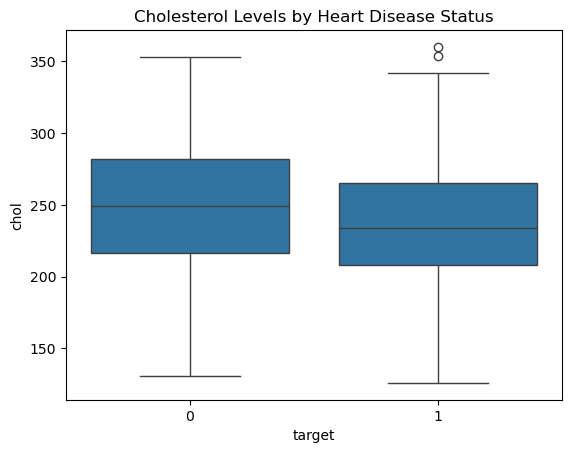

In [96]:
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels by Heart Disease Status')
plt.show()

Individuals with heart disease may show a higher range of cholesterol levels compared to those without.
Elevated cholesterol levels are a critical risk factor for heart disease, emphasizing the need for dietary and medical interventions.


### 4.Is there a relationship between chest pain type and heart disease?

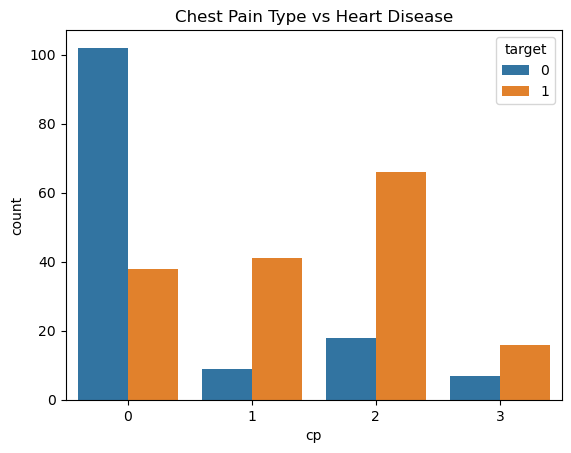

In [98]:
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

Certain chest pain types (e.g., typical angina) are strongly associated with heart disease.
Non-anginal chest pain may not always correlate with heart disease, highlighting the importance of thorough diagnostic testing.


### 5. What is the relationship between maximum heart rate (thalach) and heart disease?

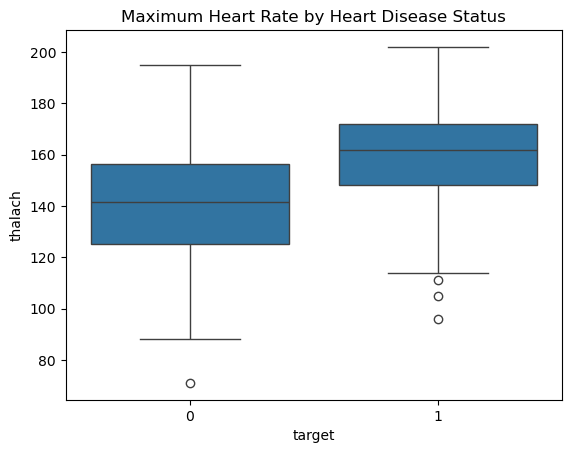

In [101]:
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Maximum Heart Rate by Heart Disease Status')
plt.show()

Individuals with heart disease may achieve lower maximum heart rates compared to those without.
This could indicate reduced cardiac efficiency, making stress tests a valuable diagnostic tool for heart disease.

### 6. Does exercise-induced angina (exang) influence heart disease?

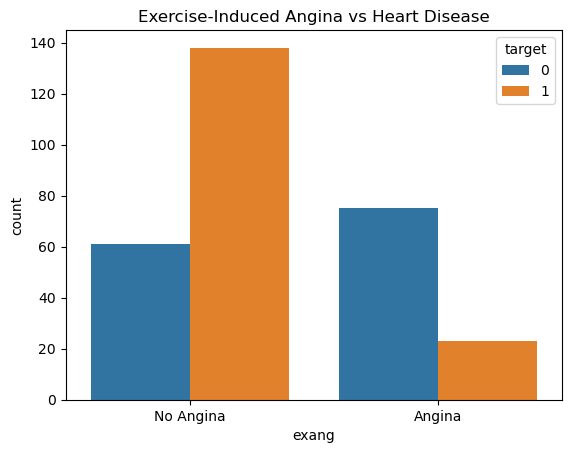

In [104]:
sns.countplot(x='exang', hue='target', data=df)
plt.title('Exercise-Induced Angina vs Heart Disease')
plt.xticks([0, 1], ['No Angina', 'Angina'])
plt.show()

Exercise-induced angina is likely more common in individuals with heart disease.
This suggests that physical activity could help reveal underlying cardiac issues, and managing angina could reduce risks.


### 7.How does oldpeak (ST depression) differ for individuals with and without heart disease?

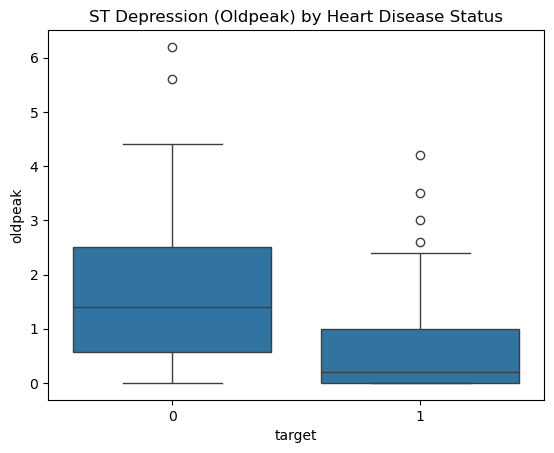

In [107]:
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title('ST Depression (Oldpeak) by Heart Disease Status')
plt.show()

Higher oldpeak values are strongly associated with heart disease, indicating poor heart functionality under stress.
This reinforces the importance of treadmill and stress ECG tests in diagnosing heart conditions.


## Data Visualization

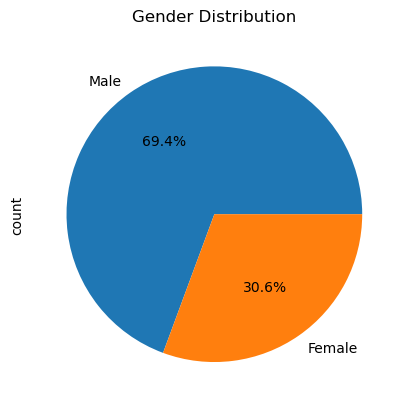

In [111]:
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Male', 'Female'])
plt.title('Gender Distribution')
plt.show()

Males constitute a larger proportion of the dataset, which may reflect the higher risk or likelihood of heart disease in males compared to females in this dataset.
This emphasizes the need to focus on gender-specific risk factors in heart disease research, as males might have distinct symptoms and progression compared to females.


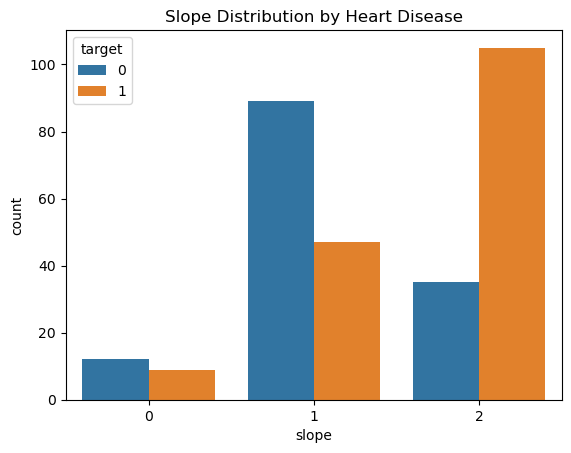

In [116]:
sns.countplot(x='slope', hue='target', data=df)
plt.title('Slope Distribution by Heart Disease')
plt.show()

Certain slope values (e.g., slope=2, indicating an upsloping ST segment) are more common in individuals without heart disease.
Flat or downsloping ST segments (slope=0 or slope=1) are more frequently observed in individuals with heart disease, reflecting poor cardiac response to stress.
This underscores the diagnostic importance of the slope variable during exercise stress tests to identify individuals at higher risk.